In [1]:
import json
from dataclasses import asdict
import os
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image

from multiagentx import Env,Group,Agent

 
[2025-02-19 16:55:58][INFO]: All agents are fully connected
 
[2025-02-19 16:55:58][INFO]: Group initialized with ID 561dd9cb-ad1d-4c6f-8ae5-355e6479b118


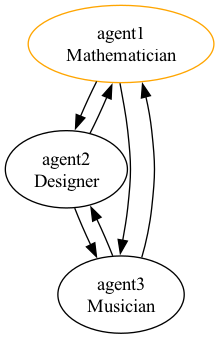

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI(
    api_key=os.environ.get("OPENAI_API_KEY"),
    base_url=os.environ.get("OPENAI_BASE_URL"),
)
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician",
              description="Transfer to me if you need help with math.", 
              model_client=model_client,
              verbose=True),
              
        Agent(name="agent2", 
              role="Designer",
              description="Transfer to me if you need help with design.",
              model_client=model_client,
              verbose=True),

        Agent(name="agent3", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True)
    ],
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [3]:
# add user input to the group message context
g.user_input("Could you suggest a song for me? Just the title will do.")
g.group_messages.context

 
[2024-12-20 10:46:36][INFO]: User input (talk): Could you suggest a song for me? Just the title will do.


[Message(sender='user', action='talk', result='Could you suggest a song for me? Just the title will do.')]

In [4]:
# process the group message context and add the response to the group message context
_ = g.call_agent(next_speaker_select_mode="auto",include_current=True,model="gpt-4o-mini",message_cut_off=3,agent=None)
g.group_messages.context

 
[2024-12-20 10:46:37][INFO]: handoff from agent1 to agent3 by using auto mode
 
[2024-12-20 10:46:38][INFO]: Calling Dify agent [agent3]
 
[2024-12-20 10:46:39][INFO]: Agent agent3 response:

"Clair de Lune" by Claude Debussy.


[Message(sender='user', action='talk', result='Could you suggest a song for me? Just the title will do.'),
 Message(sender='agent3', action='talk', result='"Clair de Lune" by Claude Debussy.')]

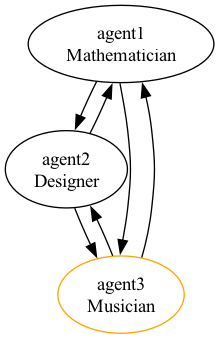

In [5]:
# current agent handoff to agent3
Image(g.draw_relations())

In [6]:
g.user_input("can you tell me the answer to 2+2")
_ = g.call_agent(next_speaker_select_mode="auto",include_current=True,model="gpt-4o-mini",message_cut_off=3,agent=None)
g.group_messages.context

 
[2024-12-20 10:35:02][INFO]: User input (talk): can you tell me the answer to 2+2
 
[2024-12-20 10:35:02][INFO]: handoff from agent3 to agent1 by using auto mode
 
[2024-12-20 10:35:03][INFO]: Calling OpenAI agent [agent1]
 
[2024-12-20 10:35:04][INFO]: Agent agent1 response:

The answer to 2 + 2 is 4.


[Message(sender='user', action='talk', result='Could you suggest a song for me? Just the title will do.'),
 Message(sender='agent3', action='talk', result='"Clair de Lune" by Claude Debussy.'),
 Message(sender='user', action='talk', result='can you tell me the answer to 2+2'),
 Message(sender='agent1', action='talk', result='The answer to 2 + 2 is 4.')]

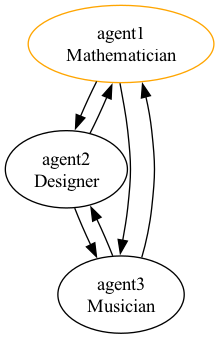

In [7]:
# current agent handoff to agent1
Image(g.draw_relations())

In [27]:

print('-'*50)
print("Below Is The Group Message Protocol Instance")
print('-'*50)
print(json.dumps(asdict(g.group_messages), indent=4))

--------------------------------------------------
Below Is The Group Message Protocol Instance
--------------------------------------------------
{
    "group_id": "667e828c-4d1f-492c-a14f-f72a646a4f10",
    "env": {
        "description": "This is a test environment",
        "members": [
            {
                "name": "agent1",
                "role": "Mathematician",
                "description": "Transfer to me if you need help with math."
            },
            {
                "name": "agent2",
                "role": "Designer",
                "description": "Transfer to me if you need help with design."
            },
            {
                "name": "agent3",
                "role": "Musician",
                "description": "Transfer to me if you need help with music."
            }
        ],
        "relationships": {
            "agent1": [
                "agent2",
                "agent3"
            ],
            "agent2": [
                "agent1"

In [5]:
g.user_input("Let's discuss what is beauty.")
_ = g.call_agent(next_speaker_select_mode="auto",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(next_speaker_select_mode="auto",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(next_speaker_select_mode="auto",include_current=False,model="gpt-4o-mini")
_ = g.call_agent(agent="agent1",model="gpt-4o-mini")

 
[2024-12-20 10:46:44][INFO]: User input (talk): Let's discuss what is beauty.
 
[2024-12-20 10:46:45][INFO]: handoff from agent3 to agent2 by using auto mode
 
[2024-12-20 10:46:45][INFO]: Calling OpenAI agent [agent2]
 
[2024-12-20 10:46:47][INFO]: Agent agent2 response:

Beauty can be seen as a multi-faceted concept that varies across cultures and individual experiences. In design, beauty often refers to harmony, balance, and proportion – aspects that are pleasing to the eye and evoke emotion. It involves color choice, layout, and form, all working together to create an experience that resonates with the viewer.

Philosophically, beauty can be subjective, often defined by personal taste or societal standards. It can invoke feelings of joy, inspiration, or nostalgia. In nature, beauty can manifest in symmetry, colors, or the serenity of landscapes.

How do you perceive beauty in your own experiences or fields?
 
[2024-12-20 10:46:48][INFO]: handoff from agent2 to agent3 by using aut

In [29]:
# reset the group messages
g.reset_group_messages()
g.group_messages.context

[]

In [6]:
print(g._build_send_message(cut_off=3,send_to="agent1"))

### Background Information
This is a test environment

### Members
- agent1 (Mathematician)
- agent2 (Designer)
- agent3 (Musician)

### Your Previous Message
```agent1:talk
As a mathematician, my perspective on beauty is often rooted in simplicity, symmetry, and elegance within mathematical expressions and structures. Concepts such as the Fibonacci sequence or the golden ratio exemplify beauty through their inherent patterns and relationships. 

In mathematics, beauty can evoke a sense of understanding or revelation, much like experiencing a beautiful piece of music or art. The interplay of numbers and shapes, their balance and harmony, can also reflect the principles discussed in music and design. 

To frame this discussion: How do you think mathematical beauty contributes to the understanding or appreciation of beauty in music and visual design? Are there specific mathematical concepts that you think resonate with the aesthetic principles outlined by agent2 and agent3?
```

### Othe

In [10]:
json.dumps(g.group_messages.context[0].to_json())

'{"sender": "user", "action": "talk", "result": "Could you suggest a song for me? Just the title will do."}'

In [11]:
g.group_messages.context[0]

Message(sender='user', action='talk', result='Could you suggest a song for me? Just the title will do.')